In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from pprint import pprint
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
%matplotlib inline
# %matplotlib notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Read data and convert categorical to numerical
Read the given data. There are some categorical feilds convert them to numerical field.

In [2]:
df = pd.read_csv("train.csv")
original_data = df

In [3]:
def convert_categorical_to_numerical(data):
    res = pd.factorize(data)
    x, y = res
    return x, y

In [4]:
array, convert_back_sales_to_categorical = convert_categorical_to_numerical(
    df['sales'])
df['sales'] = array
array, convert_back_salary_to_categorical = convert_categorical_to_numerical(
    df['salary'])
df['salary'] = array

In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.10,0.90,7,286,4,0,1,0,0,0
1,0.89,0.93,4,249,3,0,0,0,0,0
2,0.38,0.50,2,132,3,0,1,0,1,0
3,0.95,0.71,4,151,4,0,0,0,0,1
4,0.84,0.84,5,163,3,0,0,0,2,0


In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,11238.000000,11238.000000,11238.000000,11238.000000,11238.000000,11238.000000,11238.000000,11238.000000,11238.000000,11238.000000
mean,0.611518,0.716246,3.811176,200.930415,3.487720,0.145666,0.238032,0.020911,3.488343,0.596014
std,0.247939,0.170822,1.234581,49.876282,1.462832,0.352787,0.425898,0.143093,3.127870,0.639807
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,199.000000,3.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,0.810000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,6.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


In [7]:
result = pd.read_csv('sample_test.csv')

In [8]:
result

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.69,0.69,3,236,4,0,0,product_mng,medium
1,0.36,0.54,2,153,3,1,0,accounting,medium


# Analyse data if there is some pattern
The step one of machine learning is to study data. Visualise if there are any patterns between data. if any field is more important to the result.study the corelation between the fields.

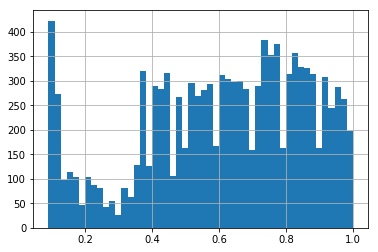

In [9]:
df['satisfaction_level'].hist(bins=50)

In [10]:
print(df.groupby('sales').size())
print(df.groupby('left').size())
print(df.groupby('Work_accident').size())

sales
0    3151
1     583
2    2001
3     474
4     926
5     682
6     625
7     577
8    1679
9     540
dtype: int64
left
0    8563
1    2675
dtype: int64
Work_accident
0    9601
1    1637
dtype: int64


/home/aman/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/aman/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/aman/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


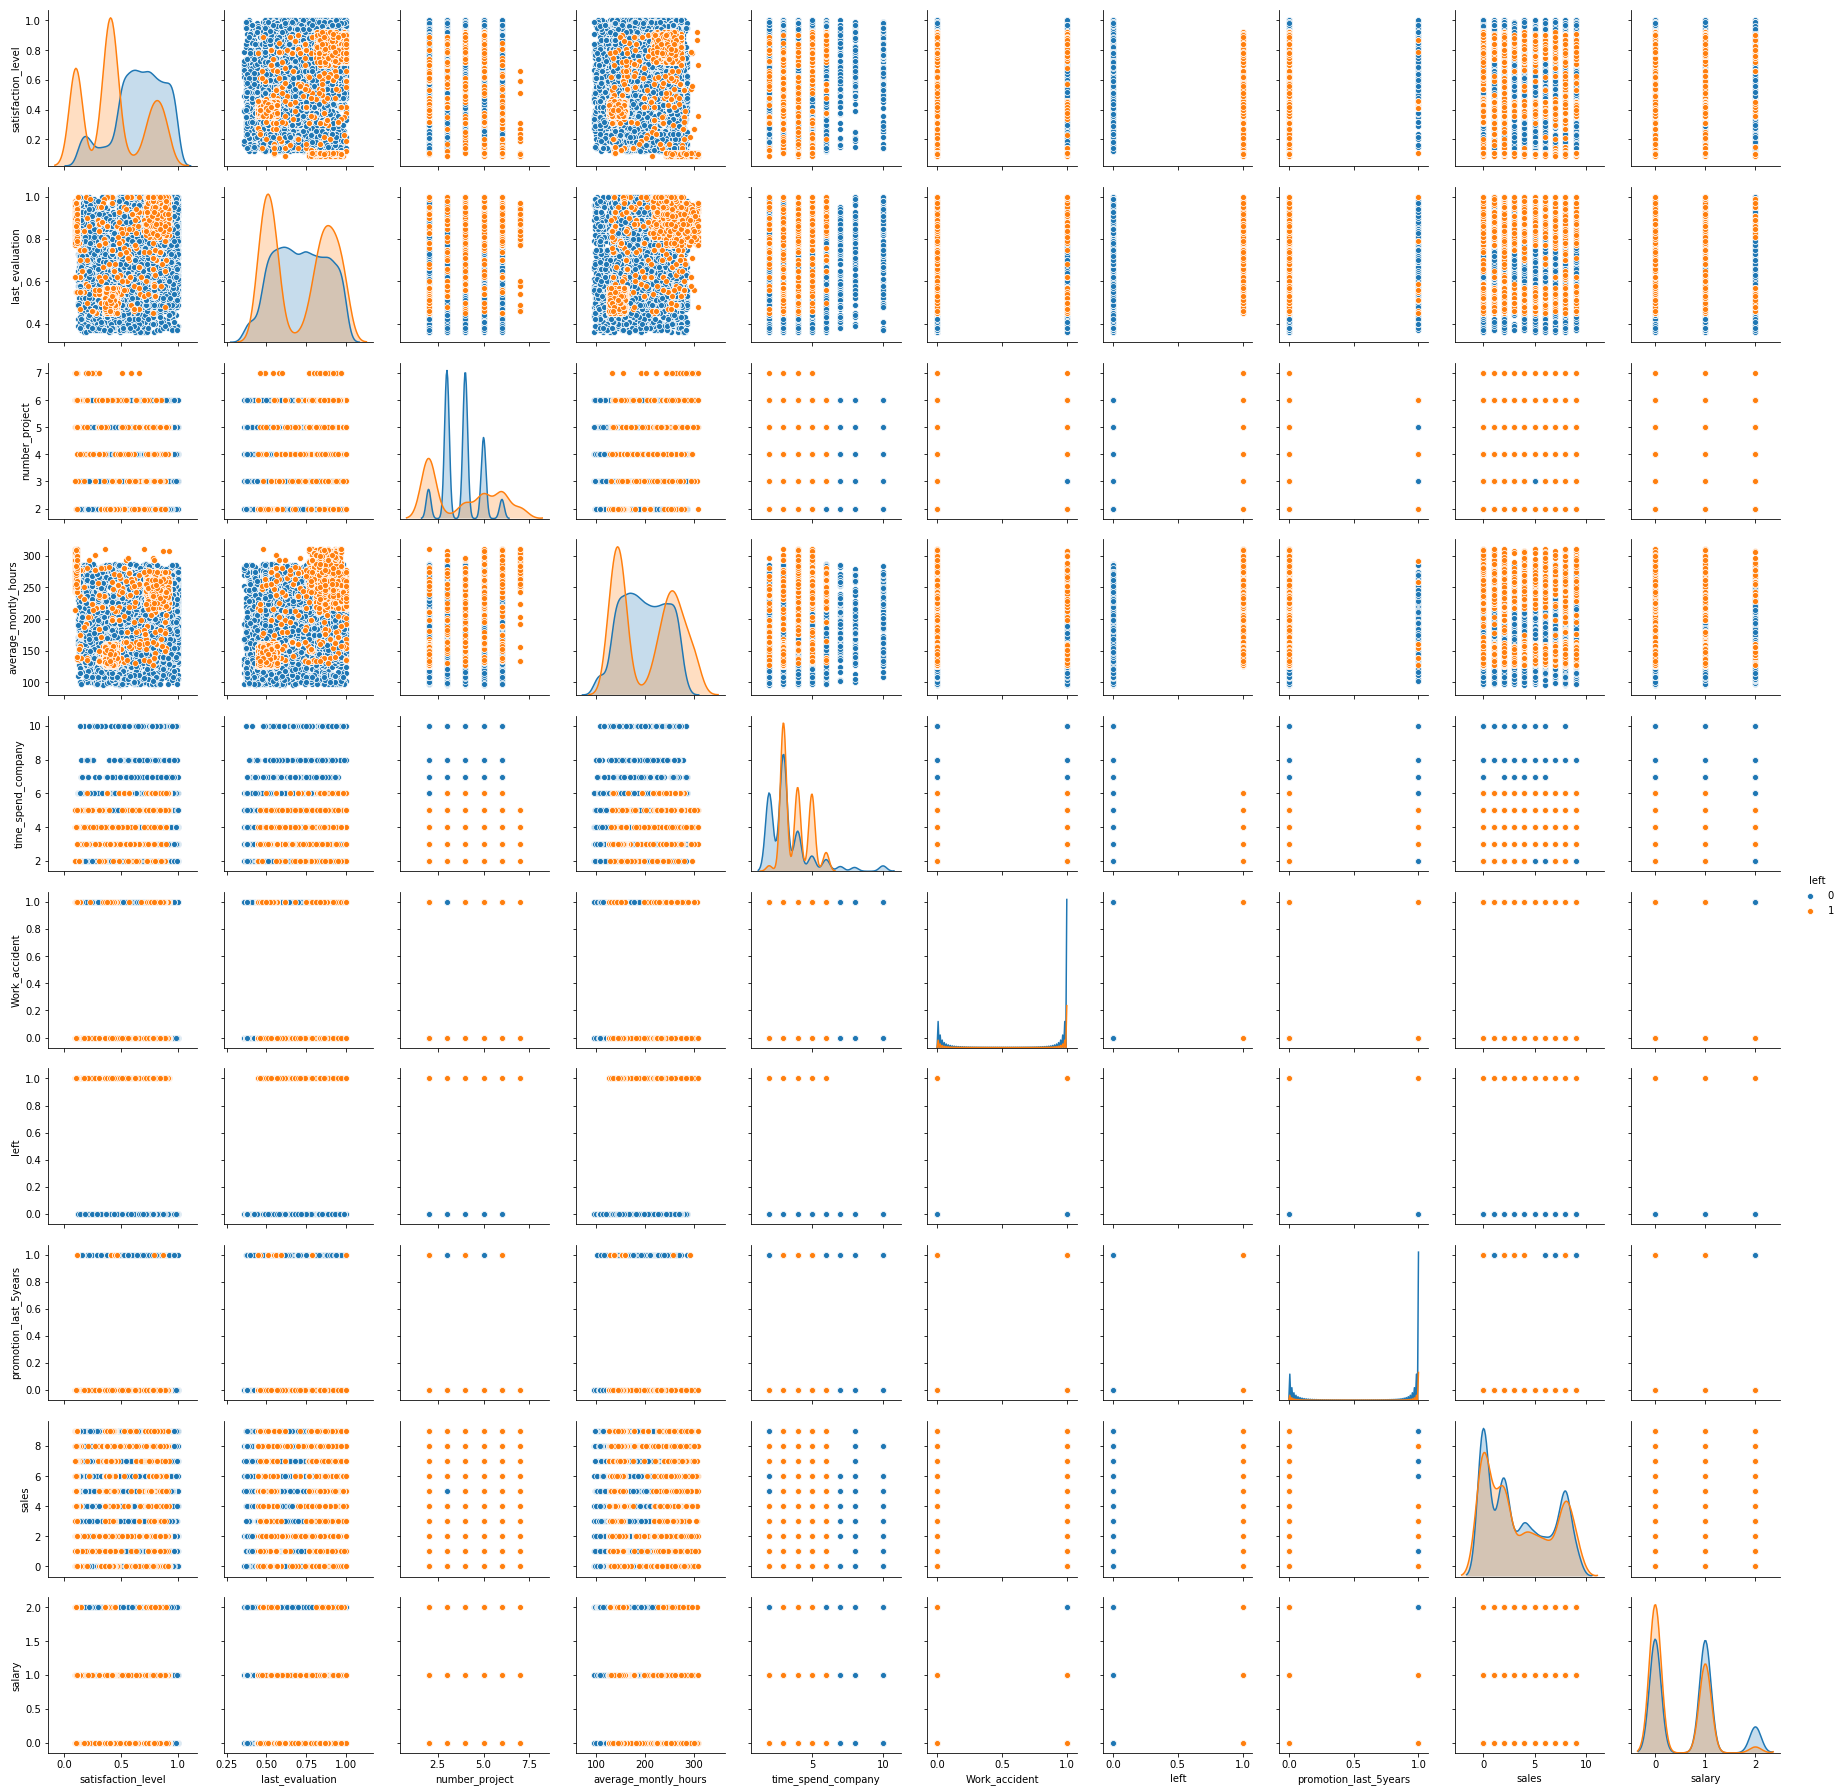

In [11]:
sns.pairplot(df, hue='left')

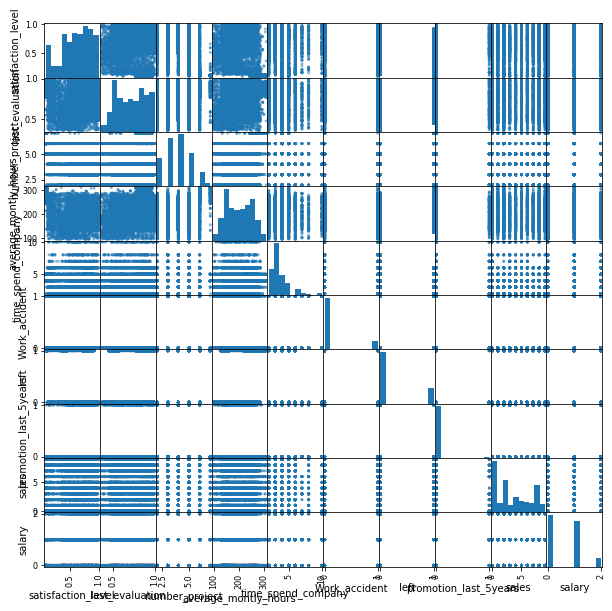

In [12]:
from pandas.plotting import scatter_matrix
# scatter plot matrix
scatter_matrix(df, figsize=(10, 10))
plt.pyplot.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe035a3cbe0>,
      dtype=object)

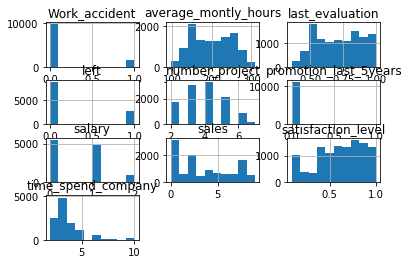

In [13]:
df.hist()

# Split data into test and training set
Split given data into training and testing data. The given data has 11K rows so a good split is around 80%. Split function is randomly selects 80% of rows and label them as training data while rest is termed as testing data.

In [14]:
def split_test_train(X, y, percent=0.8):
    mask = np.random.rand(len(df)) < percent
    X_train = X[mask]
    X_test = X[~mask]
    y_train = y[mask]
    y_test = y[~mask]
    print(X_train.shape, X_test.shape)
    return X_train, X_test, y_train, y_test

In [15]:
data_categorical = df[[
    'Work_accident', 'sales', 'promotion_last_5years', 'salary', 'left'
]]
X_categorical = data_categorical.drop('left', axis=1)
y_categorical = data_categorical[['left']]
X_train_cat, X_test_cat, y_train_cat, y_test_cat = split_test_train(
    X_categorical, y_categorical, 0.85)
train_data_categorical = X_train_cat
train_data_categorical['left'] = y_train_cat

(9563, 4) (1675, 4)


/home/aman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
X_full = df.drop('left', axis=1)
y_full = df[['left']]
X_train, X_test, y_train, y_test = split_test_train(X_full, y_full, 0.8)
train_df = X_train.copy()
train_df['left'] = y_train
print(X_train.shape, X_test.shape)

(9003, 9) (2235, 9)
(9003, 9) (2235, 9)


# Classes for Node and Decision Tree
## Node Class
Node class contain the data relevant to a node of the tree. The main feilds include
- Name (The field on the basis of which we'll have to traverse down the tree)
- information_gain (The information gain at this node)
- leaf (Boolean variable denoting leaf)
- target (If leaf then class to which the node belongs)
- value (The value on which split was made)
- class_count (Dictionary to store the number of elements class wise)
- categorical (Boolean variable denoting whether split was made categorical or continous)
- split_val (If not categorical then split value)

## Decision_tree
Simple class with init, update and add children function only.

In [17]:
class Node:
    def __init__(self,
                 name=None,
                 information_gain=0,
                 leaf=False,
                 target=None,
                 value=None,
                 class_count=None,
                 categorical=True,
                 split_val=0.0):
        self.name = name
        self.information_gain = information_gain
        self.leaf = leaf
        self.target = target
        self.value = value
        self.class_count = class_count
        self.categorical = categorical
        self.split_val = split_val

    def update(self,
               name,
               information_gain,
               leaf=False,
               target=None,
               value=None,
               class_count=None):
        self.name = name
        self.information_gain = information_gain
        self.leaf = leaf
        self.target = target
        self.value = value
        self.class_count = class_count

    def print_node(self):
        print(
            "value = {0}, name = {1}, info_gain = {2},  leaf = {3}, target = {4}, class_count = {5}, split_val = {6}"
            .format(self.value, self.name, self.information_gain, self.leaf,
                    self.target, self.class_count, self.split_val))

In [18]:
class Decision_tree:
    def __init__(self, node=None):
        if not node:
            self.root = Node()
        else:
            self.root = node
        self.children = {}

    def add_children(self, child, value):
        self.children[value] = child

    def update(self,
               name=None,
               information_gain=0,
               leaf=False,
               target=None,
               value=None,
               class_count=None):
        self.root.update(name, information_gain, leaf, target, value,
                         class_count)

# Helper Functions
### evaluate_result
This function takes two arguments y_test(original values), y_pred(predicted values) It prints the tn, fp, fn, tp, accuracy, f1_score, precision_score, recall_score. Also returns the f1_score, precision score, recall score and accuracy score.
### find_entropy
It takes the target as input and returns the entropy.
### find_gini_index
It takes the target as input and returns the gini index.
### find_misclassification
It takes the target as input and returns the misclassification.

In [19]:
def evaluate_result(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("tn = {0}, fp = {1}, fn = {2}, tp = {3}".format(tn, fp, fn, tp))
    f1 = f1_score(y_test, y_pred, average="macro")
    print("f1_score\t : ", f1)
    ps = precision_score(y_test, y_pred, average="macro")
    print("precision_score\t : ", ps)
    rs = recall_score(y_test, y_pred, average="macro")
    print("recall_score\t : ", rs)
    acs = accuracy_score(y_test, y_pred)
    print("accuracy_score\t : ", acs)
    return f1, ps, rs, acs

In [20]:
def find_entropy(target):
    #     print("in entropy")
    elements, counts = np.unique(target, return_counts=True)
    if len(elements) == 0:
        return 0
    entropy = np.sum(
        [(-entry / np.sum(counts)) * np.log2(entry / np.sum(counts))
         for entry in counts])
    return entropy

In [21]:
def find_gini_index(target):
    #     print("i was called")
    elements, counts = np.unique(target, return_counts=True)
    #     print(counts)
    if len(elements) == 0:
        return 0
    gini_index = np.sum([(entry / np.sum(counts))**2 for entry in counts])
    return 1 - gini_index

In [22]:
def find_misclassification(target):
    elements, counts = np.unique(target, return_counts=True)
    if len(elements) == 0:
        return 0
    misclassification = np.max([(-entry / np.sum(counts)) for entry in counts])
    return 1 - misclassification

In [23]:
find_entropy(train_data_categorical['left'])

0.7862154457988915

# Part 1 : Categorical Decision Tree
Decision trees are supervised learning algorithms used for both, classification and regression tasks where we will concentrate on classification in this first part of our decision tree tutorial.
The main idea of decision trees is to find those descriptive features which contain the most "information" regarding the target feature and then split the dataset along the values of these features such that the target feature values for the resulting sub_datasets are as pure as possible. The descriptive feature which leaves the target feature most purely is said to be the most informative one. This process of finding the "most informative" feature is done until we accomplish a stopping criteria where we then finally end up in so called leaf nodes. The leaf nodes contain the predictions we will make for new query instances presented to our trained model. This is possible since the model has kind of learned the underlying structure of the training data and hence can, given some assumptions, make predictions about the target feature value (class) of unseen query instances.

### Training:
For training the model the whole dataset is passed to a recursive function. Data recieved at any point of time can either be pure dor impure. Pure data means that all the entries belong to the same class. While the impure data contain the entries from more than one classes. Whenever we encounter an impure data. We will split the data into multiple smaller datasets, number of unique values in the class with maximum information gain. Which indeed would be calulated some error function for calculation. The data is splitted such that the information gain is maximized. Then the function is called recursively over the newly splitted data.
Base cases: Whenver the length of data become 0, or we encounter a pure class.

### Testing:
For Testing we need to a simple traversal in the above formed decision tree. The class at the leaf would be the class of the test row. If somehow we encounter data such that there is no path fromm the current node. We will then traverse the whole tree according to the values from there. While doing so if we encounter leaf nodes we will send the counts of class samples ther. After reciving such counts from all  possible paths. We will accumulate and declare the test as the maximum value among the accumulated results.


In [24]:
def info_gain(df, split_attribute, target, error_function=find_entropy):
    parent_entropy = error_function(df[target])
    vals, counts = np.unique(df[split_attribute], return_counts=True)
    weighted_entropy = np.sum([(child_count / np.sum(counts)) * error_function(
        df.where(df[split_attribute] == child_value).dropna()[target])
                               for (child_value,
                                    child_count) in zip(vals, counts)])
    information_gain = parent_entropy - weighted_entropy
    return information_gain

In [25]:
info_gain(train_data_categorical, 'salary', 'left')

0.01884266440824489

In [26]:
def ID3(df, original_df, features, target, parent_node_class=None):
    count = {}
    elem, count_each = np.unique(df[target], return_counts=True)
    for e, c in zip(elem, count_each):
        count[e] = c
    if len(np.unique(df[target])) <= 1:
        return Decision_tree(
            Node(None, 0, True,
                 np.unique(df[target])[0], parent_node_class, count))


#     elif len(df) == 0:
#         return Decision_tree(Node(leaf = True, target = np.unique(original_df[target])[np.argmax(np.unique(original_df[target],return_counts=True)[1])], value = parent_node_class))
    elif len(features) == 0:
        return Decision_tree(
            Node(
                leaf=True,
                target=np.unique(df[target])[np.argmax(
                    np.unique(df[target], return_counts=True)[1])],
                value=parent_node_class,
                class_count=count))
    else:
        item_values = [info_gain(df, feature, target) for feature in features]
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        tree = Decision_tree()
        tree.update(
            name=best_feature,
            information_gain=np.max(item_values),
            value=parent_node_class,
            class_count=count)
        features = [i for i in features if i != best_feature]

        for value in np.unique(df[best_feature]):
            child_df = df.where(df[best_feature] == value).dropna()
            sub_tree = ID3(
                child_df,
                original_df,
                features,
                target,
                parent_node_class=value)
            tree.add_children(sub_tree, value)

        return tree

In [27]:
dec_tree = ID3(train_data_categorical, train_data_categorical,
               ['Work_accident', 'sales', 'promotion_last_5years', 'salary'],
               'left')

In [28]:
def inorder(x, indent=0):
    pre = "\t" * indent
    print(pre, end="")
    x.root.print_node()
    weight = 1
    for value, child in x.children.items():
        weight += inorder(child, indent + 1)
    return weight

In [29]:
inorder(dec_tree)

value = None, name = salary, info_gain = 0.01884266440824489,  leaf = False, target = None, class_count = {0: 7318, 1: 2245}, split_val = 0.0
	value = 0, name = Work_accident, info_gain = 0.02704794764497509,  leaf = False, target = None, class_count = {0.0: 3313, 1.0: 1350}, split_val = 0.0
		value = 0.0, name = sales, info_gain = 0.00950965451309227,  leaf = False, target = None, class_count = {0.0: 2700, 1.0: 1286}, split_val = 0.0
			value = 0.0, name = promotion_last_5years, info_gain = 0.001748815555808969,  leaf = False, target = None, class_count = {0.0: 759, 1.0: 421}, split_val = 0.0
				value = 0.0, name = None, info_gain = 0,  leaf = True, target = 0.0, class_count = {0.0: 751, 1.0: 420}, split_val = 0.0
				value = 1.0, name = None, info_gain = 0,  leaf = True, target = 0.0, class_count = {0.0: 8, 1.0: 1}, split_val = 0.0
			value = 1.0, name = promotion_last_5years, info_gain = 0.002647571025411466,  leaf = False, target = None, class_count = {0.0: 143, 1.0: 67}, split_va

163

In [30]:
def predict_exception(query, tree):
    print("in predict exception: ", query)
    tree.root.print_node()
    if tree.root.leaf is True:
        print(list(tree.root.class_count))
        return dict(tree.root.class_count)
    if query[tree.root.name] in tree.children.keys():
        return predict_exception(query, tree.children[query[tree.root.name]])
    answer = {}
    for key, child in tree.children.items():
        res = predict_exception(query, tree.children[key])
        for target, count in res.items():
            if target in answer.keys():
                answer[target] += count
            else:
                answer[target] = count
    print("answer in predict exception: ", answer)
    return answer

In [31]:
def predict_row(query, tree):
    print("in predict row: ", query)
    tree.root.print_node()
    if tree.root.leaf is True:
        return tree.root.target
    if query[tree.root.name] in tree.children.keys():
        return predict_row(query, tree.children[query[tree.root.name]])
    answer = predict_exception(query, tree)
    print("answer =", answer)
    return max(answer, key=answer.get)

In [32]:
def test(X, tree):
    #Create new query instances by simply removing the target feature column from the original dataset and
    #convert it to a dictionary
    queries = X.to_dict(orient="records")
    print(len(queries), "####", queries[-1])
    print(len(X))
    #Create a empty DataFrame in whose columns the prediction of the tree are stored
    predicted = []
    #Calculate the prediction accuracy
    for i in range(len(X)):
        print(i)
        res = predict_row(queries[i], tree)
        predicted.append(res)
    return predicted

In [33]:
# print(X_test_cat.describe())
y_pred = test(X_test_cat, dec_tree)
evaluate_result(y_pred, y_test_cat)

1675 #### {'Work_accident': 0, 'sales': 2, 'promotion_last_5years': 0, 'salary': 1}
1675
0
in predict row:  {'Work_accident': 0, 'sales': 7, 'promotion_last_5years': 0, 'salary': 0}
value = None, name = salary, info_gain = 0.01884266440824489,  leaf = False, target = None, class_count = {0: 7318, 1: 2245}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 7, 'promotion_last_5years': 0, 'salary': 0}
value = 0, name = Work_accident, info_gain = 0.02704794764497509,  leaf = False, target = None, class_count = {0.0: 3313, 1.0: 1350}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 7, 'promotion_last_5years': 0, 'salary': 0}
value = 0.0, name = sales, info_gain = 0.00950965451309227,  leaf = False, target = None, class_count = {0.0: 2700, 1.0: 1286}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 7, 'promotion_last_5years': 0, 'salary': 0}
value = 7.0, name = promotion_last_5years, info_gain = 0.0012956874553126108,  leaf = False, target = None, c

in predict row:  {'Work_accident': 0, 'sales': 4, 'promotion_last_5years': 0, 'salary': 1}
value = 1, name = Work_accident, info_gain = 0.01146966449460185,  leaf = False, target = None, class_count = {0.0: 3262, 1.0: 839}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 4, 'promotion_last_5years': 0, 'salary': 1}
value = 0.0, name = sales, info_gain = 0.011808481925772996,  leaf = False, target = None, class_count = {0.0: 2714, 1.0: 784}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 4, 'promotion_last_5years': 0, 'salary': 1}
value = 4.0, name = promotion_last_5years, info_gain = 0.008074450845625414,  leaf = False, target = None, class_count = {0.0: 238, 1.0: 57}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 4, 'promotion_last_5years': 0, 'salary': 1}
value = 0.0, name = None, info_gain = 0,  leaf = True, target = 0.0, class_count = {0.0: 238, 1.0: 56}, split_val = 0.0
153
in predict row:  {'Work_accident': 1, 'sales': 2, 'promotion_

value = 2, name = sales, info_gain = 0.028263367355569446,  leaf = False, target = None, class_count = {0.0: 743, 1.0: 56}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 1, 'promotion_last_5years': 0, 'salary': 2}
value = 1.0, name = Work_accident, info_gain = 0.015089840030791224,  leaf = False, target = None, class_count = {0.0: 54, 1.0: 3}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 1, 'promotion_last_5years': 0, 'salary': 2}
value = 0.0, name = promotion_last_5years, info_gain = 0.010724246547396399,  leaf = False, target = None, class_count = {0.0: 44, 1.0: 3}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 1, 'promotion_last_5years': 0, 'salary': 2}
value = 0.0, name = None, info_gain = 0,  leaf = True, target = 0.0, class_count = {0.0: 39, 1.0: 3}, split_val = 0.0
321
in predict row:  {'Work_accident': 0, 'sales': 2, 'promotion_last_5years': 0, 'salary': 1}
value = None, name = salary, info_gain = 0.01884266440824489,  leaf = 

in predict row:  {'Work_accident': 0, 'sales': 9, 'promotion_last_5years': 0, 'salary': 1}
value = 0.0, name = sales, info_gain = 0.011808481925772996,  leaf = False, target = None, class_count = {0.0: 2714, 1.0: 784}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 9, 'promotion_last_5years': 0, 'salary': 1}
value = 9.0, name = promotion_last_5years, info_gain = 0.013057493937722264,  leaf = False, target = None, class_count = {0.0: 130, 1.0: 76}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 9, 'promotion_last_5years': 0, 'salary': 1}
value = 0.0, name = None, info_gain = 0,  leaf = True, target = 0.0, class_count = {0.0: 126, 1.0: 76}, split_val = 0.0
527
in predict row:  {'Work_accident': 0, 'sales': 4, 'promotion_last_5years': 0, 'salary': 0}
value = None, name = salary, info_gain = 0.01884266440824489,  leaf = False, target = None, class_count = {0: 7318, 1: 2245}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 4, 'promotion_last_5y

value = 0, name = Work_accident, info_gain = 0.02704794764497509,  leaf = False, target = None, class_count = {0.0: 3313, 1.0: 1350}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 4, 'promotion_last_5years': 0, 'salary': 0}
value = 0.0, name = sales, info_gain = 0.00950965451309227,  leaf = False, target = None, class_count = {0.0: 2700, 1.0: 1286}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 4, 'promotion_last_5years': 0, 'salary': 0}
value = 4.0, name = promotion_last_5years, info_gain = 0.009845586485083602,  leaf = False, target = None, class_count = {0.0: 238, 1.0: 107}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 4, 'promotion_last_5years': 0, 'salary': 0}
value = 0.0, name = None, info_gain = 0,  leaf = True, target = 0.0, class_count = {0.0: 238, 1.0: 105}, split_val = 0.0
685
in predict row:  {'Work_accident': 1, 'sales': 5, 'promotion_last_5years': 0, 'salary': 2}
value = None, name = salary, info_gain = 0.018842664408244

value = 0.0, name = None, info_gain = 0,  leaf = True, target = 0.0, class_count = {0.0: 385, 1.0: 224}, split_val = 0.0
810
in predict row:  {'Work_accident': 1, 'sales': 7, 'promotion_last_5years': 0, 'salary': 1}
value = None, name = salary, info_gain = 0.01884266440824489,  leaf = False, target = None, class_count = {0: 7318, 1: 2245}, split_val = 0.0
in predict row:  {'Work_accident': 1, 'sales': 7, 'promotion_last_5years': 0, 'salary': 1}
value = 1, name = Work_accident, info_gain = 0.01146966449460185,  leaf = False, target = None, class_count = {0.0: 3262, 1.0: 839}, split_val = 0.0
in predict row:  {'Work_accident': 1, 'sales': 7, 'promotion_last_5years': 0, 'salary': 1}
value = 1.0, name = sales, info_gain = 0.011308039134439285,  leaf = False, target = None, class_count = {0.0: 548, 1.0: 55}, split_val = 0.0
in predict row:  {'Work_accident': 1, 'sales': 7, 'promotion_last_5years': 0, 'salary': 1}
value = 7.0, name = promotion_last_5years, info_gain = 0.005080035337848926,  

904
in predict row:  {'Work_accident': 0, 'sales': 5, 'promotion_last_5years': 0, 'salary': 1}
value = None, name = salary, info_gain = 0.01884266440824489,  leaf = False, target = None, class_count = {0: 7318, 1: 2245}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 5, 'promotion_last_5years': 0, 'salary': 1}
value = 1, name = Work_accident, info_gain = 0.01146966449460185,  leaf = False, target = None, class_count = {0.0: 3262, 1.0: 839}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 5, 'promotion_last_5years': 0, 'salary': 1}
value = 0.0, name = sales, info_gain = 0.011808481925772996,  leaf = False, target = None, class_count = {0.0: 2714, 1.0: 784}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 5, 'promotion_last_5years': 0, 'salary': 1}
value = 5.0, name = promotion_last_5years, info_gain = 0.0,  leaf = False, target = None, class_count = {0.0: 145, 1.0: 51}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 5, 'promo

value = None, name = salary, info_gain = 0.01884266440824489,  leaf = False, target = None, class_count = {0: 7318, 1: 2245}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 0, 'promotion_last_5years': 0, 'salary': 0}
value = 0, name = Work_accident, info_gain = 0.02704794764497509,  leaf = False, target = None, class_count = {0.0: 3313, 1.0: 1350}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 0, 'promotion_last_5years': 0, 'salary': 0}
value = 0.0, name = sales, info_gain = 0.00950965451309227,  leaf = False, target = None, class_count = {0.0: 2700, 1.0: 1286}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 0, 'promotion_last_5years': 0, 'salary': 0}
value = 0.0, name = promotion_last_5years, info_gain = 0.001748815555808969,  leaf = False, target = None, class_count = {0.0: 759, 1.0: 421}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 0, 'promotion_last_5years': 0, 'salary': 0}
value = 0.0, name = None, info_gain = 0, 

value = 0.0, name = sales, info_gain = 0.011808481925772996,  leaf = False, target = None, class_count = {0.0: 2714, 1.0: 784}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 2, 'promotion_last_5years': 0, 'salary': 1}
value = 2.0, name = promotion_last_5years, info_gain = 0.005054945955430212,  leaf = False, target = None, class_count = {0.0: 468, 1.0: 177}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 2, 'promotion_last_5years': 0, 'salary': 1}
value = 0.0, name = None, info_gain = 0,  leaf = True, target = 0.0, class_count = {0.0: 461, 1.0: 177}, split_val = 0.0
1218
in predict row:  {'Work_accident': 0, 'sales': 5, 'promotion_last_5years': 0, 'salary': 0}
value = None, name = salary, info_gain = 0.01884266440824489,  leaf = False, target = None, class_count = {0: 7318, 1: 2245}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 5, 'promotion_last_5years': 0, 'salary': 0}
value = 0, name = Work_accident, info_gain = 0.02704794764497509,

1367
in predict row:  {'Work_accident': 0, 'sales': 1, 'promotion_last_5years': 0, 'salary': 1}
value = None, name = salary, info_gain = 0.01884266440824489,  leaf = False, target = None, class_count = {0: 7318, 1: 2245}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 1, 'promotion_last_5years': 0, 'salary': 1}
value = 1, name = Work_accident, info_gain = 0.01146966449460185,  leaf = False, target = None, class_count = {0.0: 3262, 1.0: 839}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 1, 'promotion_last_5years': 0, 'salary': 1}
value = 0.0, name = sales, info_gain = 0.011808481925772996,  leaf = False, target = None, class_count = {0.0: 2714, 1.0: 784}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 1, 'promotion_last_5years': 0, 'salary': 1}
value = 1.0, name = promotion_last_5years, info_gain = 0.005638527858637943,  leaf = False, target = None, class_count = {0.0: 126, 1.0: 52}, split_val = 0.0
in predict row:  {'Work_accident': 0, 

value = 3.0, name = promotion_last_5years, info_gain = 0.001975106686025928,  leaf = False, target = None, class_count = {0.0: 138, 1.0: 1}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 3, 'promotion_last_5years': 1, 'salary': 2}
value = 1.0, name = None, info_gain = 0,  leaf = True, target = 0.0, class_count = {0.0: 24}, split_val = 0.0
1503
in predict row:  {'Work_accident': 0, 'sales': 9, 'promotion_last_5years': 0, 'salary': 1}
value = None, name = salary, info_gain = 0.01884266440824489,  leaf = False, target = None, class_count = {0: 7318, 1: 2245}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 9, 'promotion_last_5years': 0, 'salary': 1}
value = 1, name = Work_accident, info_gain = 0.01146966449460185,  leaf = False, target = None, class_count = {0.0: 3262, 1.0: 839}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 9, 'promotion_last_5years': 0, 'salary': 1}
value = 0.0, name = sales, info_gain = 0.011808481925772996,  leaf = Fals

in predict row:  {'Work_accident': 0, 'sales': 4, 'promotion_last_5years': 0, 'salary': 0}
value = None, name = salary, info_gain = 0.01884266440824489,  leaf = False, target = None, class_count = {0: 7318, 1: 2245}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 4, 'promotion_last_5years': 0, 'salary': 0}
value = 0, name = Work_accident, info_gain = 0.02704794764497509,  leaf = False, target = None, class_count = {0.0: 3313, 1.0: 1350}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 4, 'promotion_last_5years': 0, 'salary': 0}
value = 0.0, name = sales, info_gain = 0.00950965451309227,  leaf = False, target = None, class_count = {0.0: 2700, 1.0: 1286}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sales': 4, 'promotion_last_5years': 0, 'salary': 0}
value = 4.0, name = promotion_last_5years, info_gain = 0.009845586485083602,  leaf = False, target = None, class_count = {0.0: 238, 1.0: 107}, split_val = 0.0
in predict row:  {'Work_accident': 0, 'sa

/home/aman/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/aman/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(0.4263698630136986, 0.5, 0.3716417910447761, 0.7432835820895523)

## Results
- tn = 1293, fp = 406, fn = 0, tp = 0
- f1_score	 :  0.4321524064171123
- precision_score	 :  0.5
- recall_score	 :  0.3805179517363155
- accuracy_score	 :  0.761035903472631

# Part 2: Continuous and Categorical Data
The main challenge with continous data is that it can't be trained as categorical data. Because it would result in the overfitting of data. As there would be new leaf for almost every data. This would result in almost worst of the decision trees.
To overcome this we have to split data into two bins. So we will find a thershold, If the value is below that threshold it will go to left otherwise right.
### Training:
For training the model the whole dataset is passed to a recursive function. Data recieved at any point of time can either be pure dor impure. Pure data means that all the entries belong to the same class. While the impure data contain the entries from more than one classes. Whenever we encounter an impure data. We will find the maximum information gain among all the possible columns. For categorical columns we will simply follow the above procedure, indeed we're using the same functions. While for continuous data it was little bit tricky. As it also involves finding the best split even for the column. For that we try every of the unique entry as a split point then evaluated on the basis of information gain. The split with maximum inforamtion gain is choosen as the split for that column. 
Among all the Information gains the split with maximum Information gain is choosen, Then data is splitted accordingly and the fucntion is called on newly splitted data.
### Testing:
We will traverse the tree from root to leaf according to the conditions mentioned below. The class of the test row will be the class of the leaf reached by traversing while adhering to the conditions mentioned below.<br>
While testing suppose we reach a node. If the attribute which is used for splitting is categorical than the path is choosen accordingly. Otherwise the condition is evaluated. If the data_value is less than split_val we go to the left child otherwise we go to the right child.<br>
If at node N the value is missing or there is no path for the values in data(categorical) then the whole tree is propogated according to the data from the given node. At leaf nodes the count of each count is returned. All such counts are accumulated at N, the class with maximum count is returned.

In [34]:
def info_gain_continuous(df,
                         split_attribute,
                         target,
                         split_value,
                         error_function=find_entropy):
    if len(df) == 0:
        print("error")
    parent_entropy = error_function(df[target])
    less_df = df.where(df[split_attribute] <= split_value).dropna()[target]
    greater_df = df.where(df[split_attribute] > split_value).dropna()[target]
    weighted_entropy = (len(less_df) / (len(less_df) + len(greater_df))
                        ) * error_function(less_df)
    weighted_entropy += (len(greater_df) / (len(less_df) + len(greater_df))
                         ) * error_function(greater_df)
    information_gain = parent_entropy - weighted_entropy
    return information_gain

In [35]:
def find_best_split_for_continuous_attribute(df,
                                             split_feature,
                                             target,
                                             error_function=find_entropy):
    possible_splits = list(np.unique(df[split_feature]))
    if len(possible_splits) == 1:
        return 0, 0
    del possible_splits[-1]
    info_gain = [
        info_gain_continuous(df, split_feature, target, split, error_function)
        for split in possible_splits
    ]
    return np.max(info_gain), possible_splits[np.argmax(info_gain)]

In [36]:
def ID3_for_continuous(df,
                       original_df,
                       categorical_features,
                       continuous_features,
                       target,
                       parent_node_class=None,
                       max_depth=None,
                       depth=0,
                       error_function=find_entropy):
    count = {}
    elem, count_each = np.unique(df[target], return_counts=True)
    for e, c in zip(elem, count_each):
        count[e] = c
    #     print(len(df), count)
    #     print(depth, max_depth)
    if max_depth == depth:
        return Decision_tree(
            Node(
                leaf=True,
                target=np.unique(df[target])[np.argmax(
                    np.unique(df[target], return_counts=True)[1])],
                value=parent_node_class,
                class_count=count))
    if len(np.unique(df[target])) <= 1:
        return Decision_tree(
            Node(None, 0, True,
                 np.unique(df[target])[0], parent_node_class, count))

    elif len(df) == 0:
        return Decision_tree(
            Node(
                leaf=True,
                target=np.unique(original_df[target])[np.argmax(
                    np.unique(original_df[target], return_counts=True)[1])],
                value=parent_node_class))

    else:
        IG_categorical = [
            info_gain(df, feature, target, error_function)
            for feature in categorical_features
        ]
        IG_continuous = [
            find_best_split_for_continuous_attribute(df, feature, target,
                                                     error_function)
            for feature in continuous_features
        ]
        #         to_remove = []
        #         for i in range(len(IG_continuous)):
        #             if IG_continuous[i][0] == 0:
        #                 to_remove.append(i)
        #                 del continuous_features[i]
        #         for i in to_remove:
        #             del IG_continuous[i]
        IG_categorical.append(0)
        IG_continuous.append((0, 0))
        IG = max(np.max(IG_categorical), max(IG_continuous)[0])
        #         print(len(df), IG, np.max(IG_categorical), max(IG_continuous))
        if IG == 0:
            return Decision_tree(
                Node(
                    leaf=True,
                    target=np.unique(df[target])[np.argmax(
                        np.unique(df[target], return_counts=True)[1])],
                    value=parent_node_class,
                    class_count=count))

        if (np.max(IG_categorical) > max(IG_continuous)[0]):
            best_feature_index = np.argmax(IG_categorical)
            best_feature = categorical_features[best_feature_index]
            tree = Decision_tree()
            tree.update(
                name=best_feature,
                information_gain=np.max(IG_categorical),
                value=parent_node_class,
                class_count=count)
            categorical_features = [
                i for i in categorical_features if i != best_feature
            ]

            for value in np.unique(df[best_feature]):
                child_df = df.where(df[best_feature] == value).dropna()
                sub_tree = ID3_for_continuous(
                    child_df, original_df, categorical_features,
                    continuous_features, target, value, max_depth, depth + 1,
                    error_function)
                tree.add_children(sub_tree, value)
        else:
            best_feature_index = IG_continuous.index(max(IG_continuous))
            best_feature = continuous_features[best_feature_index]
            #             print(best_feature)
            split_val = max(IG_continuous)[1]
            tree = Decision_tree(
                Node(
                    name=best_feature,
                    information_gain=max(IG_continuous)[0],
                    value=parent_node_class,
                    class_count=count,
                    categorical=False,
                    split_val=split_val))
            left_df = df.where(df[best_feature] <= split_val).dropna()
            right_df = df.where(df[best_feature] > split_val).dropna()
            left_child = ID3_for_continuous(
                left_df, original_df, categorical_features,
                continuous_features, target, split_val, max_depth, depth + 1,
                error_function)
            right_child = ID3_for_continuous(
                right_df, original_df, categorical_features,
                continuous_features, target, split_val, max_depth, depth + 1,
                error_function)
            tree.add_children(left_child, 0)
            tree.add_children(right_child, 1)

        return tree

In [37]:
def predict_exception_continuous(query, tree):
    #     print("in predict exception: ", query)
    #     tree.root.print_node()
    if tree.root.leaf is True:
        return dict(tree.root.class_count)
    if tree.root.categorical:
        if query[tree.root.name] in tree.children.keys():
            return predict_exception_continuous(
                query, tree.children[query[tree.root.name]])
    else:
        child = int(query[tree.root.name] > tree.root.split_val)
        #         print(query[tree.root.name], tree.root.split_val, child)
        return predict_exception_continuous(query, tree.children[child])
    answer = {}
    for key, child in tree.children.items():
        res = predict_exception_continuous(query, tree.children[key])
        for target, count in res.items():
            if target in answer.keys():
                answer[target] += count
            else:
                answer[target] = count


#     print("answer in predict exception: ", answer)
    return answer

In [43]:
def predict_row_continuous(query, tree):
    #     print("in predict row: ", query)
    #     tree.root.print_node()
    if tree.root.leaf is True:
        return tree.root.target
    if tree.root.categorical:
        if query[tree.root.name] in tree.children.keys():
            return predict_row_continuous(query,
                                          tree.children[query[tree.root.name]])
    else:
        child = query[tree.root.name] > tree.root.split_val
        #         print(query[tree.root.name], tree.root.split_val, child)
        return predict_row_continuous(query, tree.children[child])
    answer = predict_exception_continuous(query, tree)
    #     print("answer =", answer)
    return max(answer, key=answer.get)

In [44]:
def test_continuous(X, tree):
    #Create new query instances by simply removing the target feature column from the original dataset and
    #convert it to a dictionary
    queries = X.to_dict(orient="records")
    #     print(len(queries), "####", queries[-1])
    #     print(len(X))
    #Create a empty DataFrame in whose columns the prediction of the tree are stored
    predicted = []
    #Calculate the prediction accuracy
    for i in range(len(X)):
        #         print(i)
        res = predict_row_continuous(queries[i], tree)
        predicted.append(res)
    return predicted

In [47]:
continuous_features = [
    'satisfaction_level', 'last_evaluation', 'number_project',
    'average_montly_hours', 'time_spend_company'
]
categorical_features = [
    'Work_accident', 'promotion_last_5years', 'sales', 'salary'
]
target = 'left'
full_dec_tree = ID3_for_continuous(train_df, train_df, categorical_features,
                                   continuous_features, target)
# inorder(full_dec_tree)

In [48]:
predict = test_continuous(X_test, full_dec_tree)
evaluate_result(y_test, predict)

tn = 1712, fp = 36, fn = 13, tp = 474
f1_score	 :  0.968371859026547
precision_score	 :  0.9609377664109122
recall_score	 :  0.9763554945752024
accuracy_score	 :  0.978076062639821


(0.968371859026547, 0.9609377664109122, 0.9763554945752024, 0.978076062639821)

## Results:
- tn = 1668, fp = 36, fn = 24, tp = 496
- f1_score	 :  0.9626489674723562
- precision_score	 :  0.9590732149522743
- recall_score	 :  0.9663596966413868
- accuracy_score	 :  0.9730215827338129

# Part 3: Effectiveness of Misclassification, entropy and gini function:
I constructed 3 trees with each of the mentioned fucntions, They are evaluated over the test data. The results are stored in a dataframe.
<br>
I've also done the comparison with scikit learn here itself. The results are quite similar.

In [49]:
functions = [find_entropy, find_misclassification, find_gini_index]
columns = ['metrics', 'f1-score', 'precision', 'recall', 'accuracy']
result_df = pd.DataFrame(index=np.arange(0, 3), columns=columns)
for i, function in enumerate(functions):
    dec_tree = ID3_for_continuous(
        train_df,
        train_df,
        categorical_features,
        continuous_features,
        target,
        error_function=function)
    predict = test_continuous(X_test, dec_tree)
    f1, ps, rs, acs = evaluate_result(y_test, predict)
    result_df.loc[i] = [function.__name__, f1, ps, rs, acs]

tn = 1712, fp = 36, fn = 13, tp = 474
f1_score	 :  0.968371859026547
precision_score	 :  0.9609377664109122
recall_score	 :  0.9763554945752024
accuracy_score	 :  0.978076062639821
tn = 1694, fp = 54, fn = 139, tp = 348
f1_score	 :  0.8645032886666881
precision_score	 :  0.894919836171027
recall_score	 :  0.8418433034644464
accuracy_score	 :  0.9136465324384787


KeyboardInterrupt: 

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini",
                               max_depth=7)
clf_gini.fit(X_train, y_train)
print(X_test.shape, X_train.shape)
y_pred = clf_gini.predict(X_test)
evaluate_result(y_test, y_pred)

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy",
                               max_depth=7)
clf_entropy.fit(X_train, y_train)
print(X_test.shape, X_train.shape)
y_pred = clf_entropy.predict(X_test)
evaluate_result(y_test, y_pred)

In [ ]:
print(result_df.head())

# Part 4: Visualize data on 2D Plot
I've alredy did this while studying the data. However as mentioned in the assignment the graph should be among the variables with visible decision boundaries.<br>
I've found satisfaction level, last evaluation and average monthly hours are resulting in pretty nice decision boundaries

In [ ]:
print(df.head())

In [ ]:
visual_df = df[['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'left']]
sns.pairplot(visual_df, hue='left')

# Part 5: Graph between depth, number of nodes and training error and validation error.
I created trees with restricted depths and calculated the training and validation error over.

In [ ]:
training_accuracy = []
depth = []
validation_accuracy = []
no_of_node = []
for i in range(1,16):
    dec_tree = ID3_for_continuous(
        train_df,
        train_df,
        categorical_features,
        continuous_features,
        target,
        max_depth=i)
    depth.append(i)
    no_of_node.append(inorder(dec_tree))
    predict = test_continuous(X_test, dec_tree)
    validation_accuracy.append(evaluate_result(y_test, predict)[-1])
    predict = test_continuous(X_train, dec_tree)
    training_accuracy.append(evaluate_result(y_train, predict)[-1])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(depth, training_accuracy, label = 'training accuracy')
plt.plot(depth, validation_accuracy, label = 'validation_accuracy')
plt.show()

In [ ]:
training_accuracy = [1.0-i for i in training_accuracy]
validation_accuracy = [1.0 -i for i in validation_accuracy]

In [ ]:
plt.plot(no_of_node, training_accuracy, label = 'training accuracy')
plt.plot(no_of_node, validation_accuracy, label = 'validation_accuracy')
plt.show()

# Part 6: Handling missing values in Testing data
Missing values in the test can be handled by traversing the tree. Suppose we are at node N and the split field is F. The value corresponding to F is missing in the test data. We will then traverse all the childrens of node N as we are doing for normal case. But instead of returning the class we will return the count/ no. of samples of each class from leafs. Then total count of each class is calculated at node N. The class with highest count is returned as predicted class for the corresponding test data/row.
Other ways of handling missing data is to replace the missing values by mean of all the values of that column.